<a href="https://colab.research.google.com/github/alihammadbaig/ML/blob/master/Optus_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting my GDrive to read data from

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
!ls "/content/gdrive/My Drive/Colab Notebooks/data/optus_case_study/"

adhoc_Interview_Prep_Widgets_Analysis_10.csv


## Loading the python packages

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd

**Two ways to import data **


1.   Mounting Google drive and then reading the files
2.   Using PyDrive package as shown here # The othe way to access data from Google drive is by using PyDrive as 
https://colab.research.google.com/drive/1FK6INf-TvUIJgVjIicKjK5AS9e3D5pdh#scrollTo=mNZVG_19dEGO&line=6&uniqifier=1





### Reading the source CSV into a pandas dataframe

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/optus_case_study/adhoc_Interview_Prep_Widgets_Analysis_10.csv")

### Summary Statistics

In [12]:
pd.options.display.float_format = '{:10,.0f}'.format
df.describe()

,FullvisitorID,visitid,Bounces,Sessions,Pages_Viewed,Seconds_Spent
count,"591,370","591,370","88,828","591,370","575,272","459,887"
mean,"4,604,303,073,569,255,936","1,552,617,294",1,1,5,463
std,"2,662,123,569,004,083,200","271,751",0,0,6,741
min,"46,318,458,441,294","1,552,132,609",1,1,1,1
25%,"2,296,636,107,343,413,504","1,552,380,436",1,1,1,55
50%,"4,599,712,832,274,812,928","1,552,610,800",1,1,3,172
75%,"6,907,440,740,499,332,096","1,552,866,166",1,1,6,538
max,"9,223,351,748,974,115,840","1,553,086,797",1,1,335,"51,003"


## Reading data using PyDrive

In [13]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1mHqU3t-mcBdfvN7InT-UT2LKD4bBU-EY'
fluff, id = link.split('=')
print (id)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('optus_analysis.csv')  
df3 = pd.read_csv('optus_analysis.csv')

    100% |████████████████████████████████| 993kB 18.8MB/s 
1mHqU3t-mcBdfvN7InT-UT2LKD4bBU-EY


### Exploring Data

In [14]:
df3.head()

,FullvisitorID,visitid,Date_,Product_Category,Channel,Device,City,Bounces,Sessions,Pages_Viewed,Seconds_Spent
0,2377446927407823845,1552178767,2019-03-10,Widgets,Organic Search,desktop,Sydney,nan,1,25,"2,846"
1,7191692962248895568,1552703550,2019-03-16,Widgets,Organic Search,desktop,Sydney,nan,1,42,"9,516"
2,4938426958397847793,1552169203,2019-03-10,Widgets,Organic Search,mobile,Melbourne,nan,1,21,"1,904"
3,8125317065871044486,1552289938,2019-03-11,Widgets,Organic Search,desktop,Melbourne,nan,1,25,"2,743"
4,7191692962248895568,1552269641,2019-03-11,Widgets,Direct to Site,desktop,Sydney,nan,1,31,"3,270"


In [13]:
df.shape

(591370, 11)

In [16]:
df.dtypes

FullvisitorID         int64
visitid               int64
Date_                object
Product_Category     object
Channel              object
Device               object
City                 object
Bounces             float64
Sessions              int64
Pages_Viewed        float64
Seconds_Spent       float64
dtype: object

In [26]:
# df["City"].value_counts(dropna=False)
df.apply(pd.Series.value_counts).head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6206: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,FullvisitorID,visitid,Date_,Product_Category,Channel,Device,City,Bounces,Sessions,Pages_Viewed,Seconds_Spent
1552132609,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552132960,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552133460,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552133767,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552134145,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## How many unique visitors visited this category

In [29]:
df.groupby('FullvisitorID')['FullvisitorID'].nunique().count()

391706

## How many sessions were there to this category

### Unique visits

In [30]:
df.groupby('visitid')['visitid'].nunique().count()

406766

### "visitid"  and  "FullvisitorID" uniquely identifies a session

In [36]:
df.groupby(['FullvisitorID', 'visitid'])['visitid', 'FullvisitorID'].nunique().count()

visitid          590592
FullvisitorID    590592
dtype: int64

In [41]:
1552195580
filter1 = df['visitid'] == 1552195580
df1 = df.groupby(['FullvisitorID', 'visitid']).nunique()
df1.where(filter1).head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


IndexingError: ignored

## Top entry channels

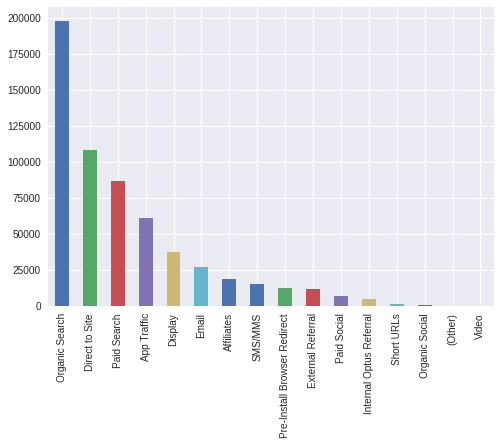

In [57]:
df['Channel'].value_counts().plot(kind='bar')

In [58]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated
